# 1. Install and import dependencies

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\weesh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-20 Python-3.9.17 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections

In [6]:
img = "https://ultralytics.com/images/zidane.jpg"

In [7]:
result = model(img)
result.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2283.7ms pre-process, 194.0ms inference, 15.9ms NMS per image at shape (1, 3, 384, 640)


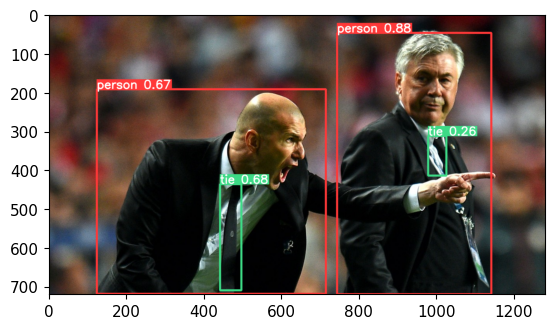

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

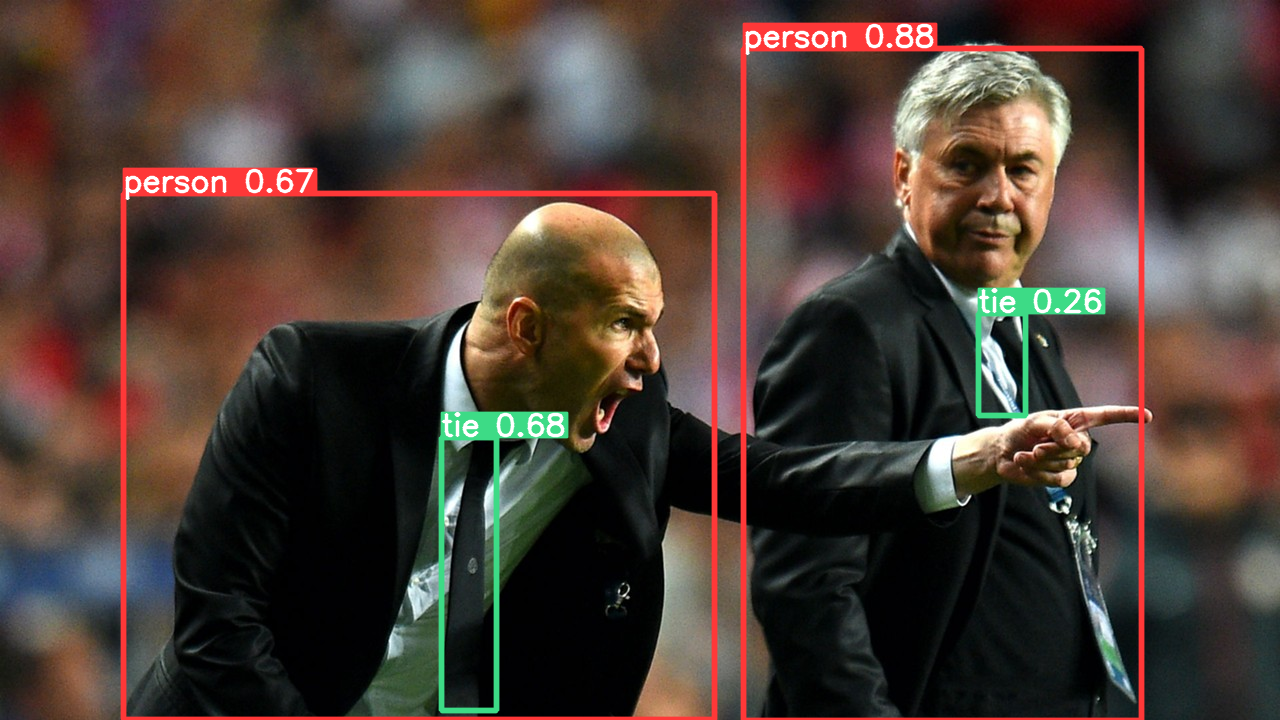

In [10]:
result.show()

# 4. Real Time Detections

In [25]:
cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret,frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO", np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()


# 5. Train from scratch

In [26]:
import uuid
import os
import time

In [27]:
IMAGES_PATH = os.path.join('data','images')
labels = ['neutral','frown']
number_imgs = 20

In [36]:
cap = cv2.VideoCapture(0)
# Loop thru labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label,img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file
        cv2.imwrite(imgname, frame)
        
        # Render to screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [37]:
for label in labels:
    print('Collecting images for {}'.format(label))
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\neutral.5bf03f26-6f14-11ee-addb-581cf8fc86df.jpg
data\images\neutral.5bf03f27-6f14-11ee-9d8c-581cf8fc86df.jpg
data\images\neutral.5bf03f28-6f14-11ee-9e8c-581cf8fc86df.jpg
data\images\neutral.5bf06617-6f14-11ee-8deb-581cf8fc86df.jpg
data\images\neutral.5bf06618-6f14-11ee-a5f2-581cf8fc86df.jpg
data\images\neutral.5bf06619-6f14-11ee-8e8e-581cf8fc86df.jpg
data\images\neutral.5bf0661a-6f14-11ee-b35e-581cf8fc86df.jpg
data\images\neutral.5bf0661b-6f14-11ee-99ca-581cf8fc86df.jpg
data\images\neutral.5bf0661c-6f14-11ee-8d9f-581cf8fc86df.jpg
data\images\neutral.5bf0661d-6f14-11ee-a443-581cf8fc86df.jpg
data\images\neutral.5bf0661e-6f14-11ee-ba47-581cf8fc86df.jpg
data\images\neutral.5bf0661f-6f14-11ee-aed1-581cf8fc86df.jpg
data\images\neutral.5bf06620-6f14-11ee-8085-581cf8fc86df.jpg
data\images\neutral.5bf06621-6f14-11ee-8140-581cf8fc86df.jpg
data\images\neutral.5bf06622-6f14-11ee-b4c6-581cf8fc86df.jpg
data\images\neutral.5bf06623-6f14-11ee-8859-581cf8fc86df.jpg
data\images\neutral.5bf0

In [38]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [41]:
!pip install pyqt lxml --upgrade

ERROR: Could not find a version that satisfies the requirement pyqt (from versions: none)
ERROR: No matching distribution found for pyqt


In [60]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data dataset.yaml --weights yolov5s.pt

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]
train.py: error: unrecognize

# 6. Load Model

In [54]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\weesh/.cache\torch\hub\master.zip
YOLOv5  2023-10-20 Python-3.9.17 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [55]:
img = os.path.join('data', 'images', 'frown.4be4024c-6f14-11ee-b953-581cf8fc86df.jpg')

In [56]:
results = model(img)

In [57]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 7.0ms pre-process, 118.7ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


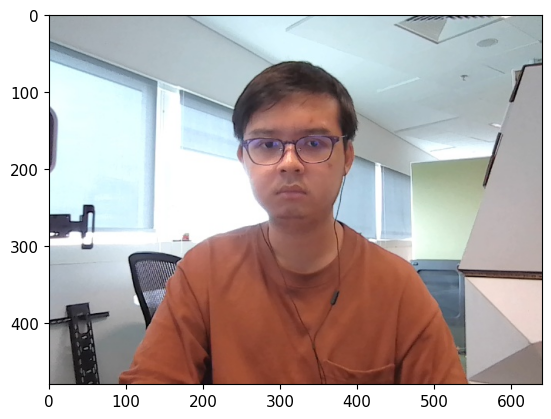

In [58]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [59]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()